# Locus selection
When inspecting the results of the reference-based assembly you may find that many loci are not covered by many or any reads. In that case you may want to make a selection of loci with good coverage and continue to only work with these loci for downstream analyses. `secapr` has a function that helps you to extract loci with good coverage called `locus_selection`.

In [1]:
%%bash
source activate secapr_env
secapr locus_selection -h

usage: secapr locus_selection [-h] --input INPUT --output OUTPUT [--n N]
                              [--read_cov READ_COV] [--reference REFERENCE]

Extract the n loci with the best read-coverage from you reference-based
assembly (bam-files)

optional arguments:
  -h, --help            show this help message and exit
  --input INPUT         The folder with the results of the reference based
                        assembly.
  --output OUTPUT       The output directory where results will be safed.
  --n N                 The n loci that are best represented accross all
                        samples will be extracted.
  --read_cov READ_COV   The threshold for what average read coverage the
                        selected target loci should at least have.
  --reference REFERENCE
                        Path to reference library fasta file (secapr will find
                        it by itself if the reference assembly was executed
                        with secapr).


This function will compile the average read-coverage for each locus and sample and will select the `n` loci with the best coverage accross all samples.
You can run this function simply by providing the folder containing the remapping results (`--input`) and stating how many of the best loci you want to extract (`--n`). You can additionally use the `--read_cov` flag to provide a custom read coverage threshold (default=3). Only loci with an average read-coverage above this threshold in all samples are being extracted. If not n loci are found that fulfil this threshold for all samples, the script will print a warning to the screen but still extract all loci fulfilling the requirement.

    secapr locus_selection --input ../../data/processed/remapped_reads --output ../../data/processed/selected_loci --n 50

## Which loci were selected?
Running the script as in the example command above will leave us with 50 loci that are present in all samples with an average read-coverage of more than 3. Below we visualize which loci were extracted.

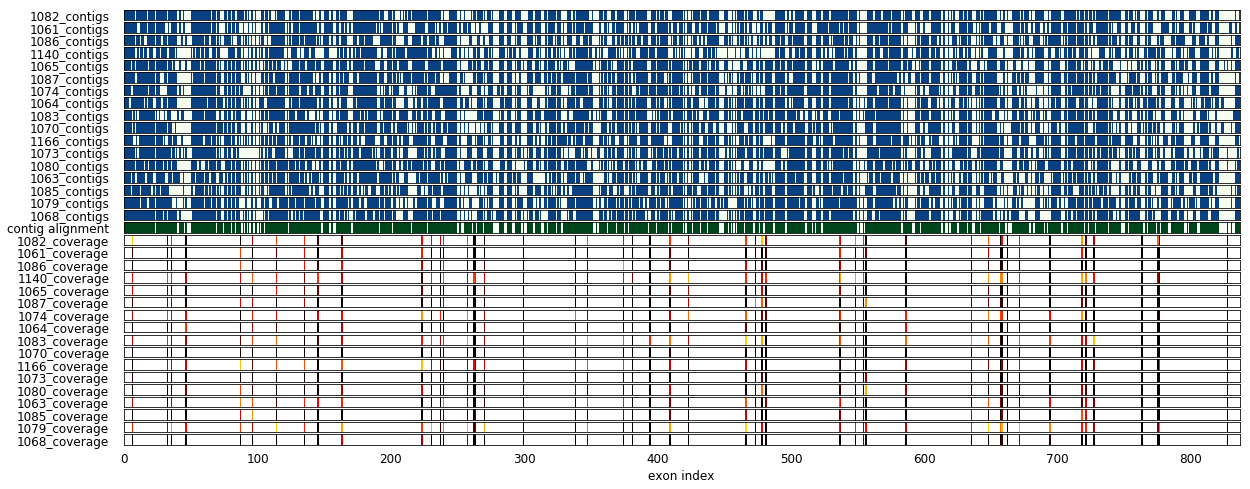

In [3]:
import sys
sys.path.append("../../src")
import plot_contig_data_function as secapr_plot

contig_input_file = '../../data/processed/target_contigs/match_table.txt'
alignment_folder = '../../data/processed/alignments/contig_alignments'
read_cov_file_selected = '../../data/processed/selected_loci/overview_selected_loci.txt'
secapr_plot.plot_contigs_alignments_read_cov(contig_input_file,alignment_folder,read_cov_file_selected,norm_value=10)

We can also plot the results of the selection in a more detailed view, by showing the contig and read coverage of only the selected loci:

Reducing final matrix to selected loci.


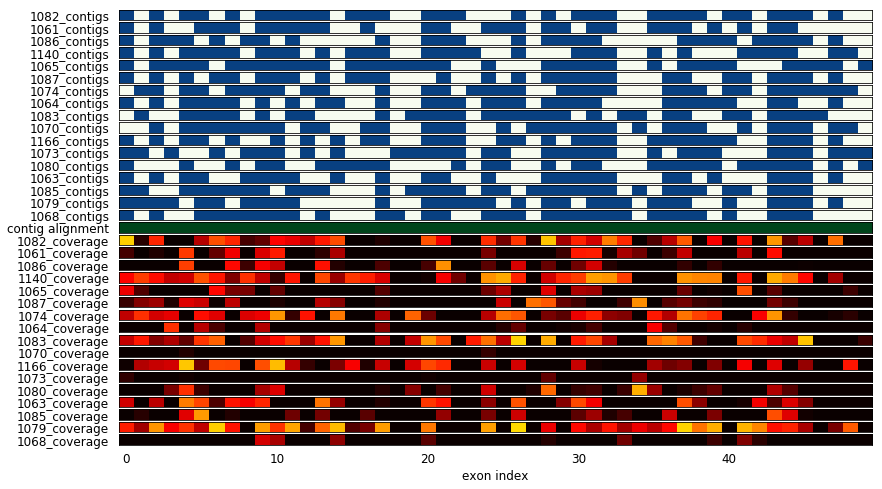

In [5]:
%matplotlib inline
selected_loci = secapr_plot.plot_contigs_alignments_read_cov(contig_input_file,alignment_folder,read_cov_file_selected,reduce=True,norm_value=10)
#selected_loci.savefig(os.path.join('/Users/tobias/GitHub/seqcap_processor/data/processed/selected_loci_50/','contig_exon_coverage_matrix_reduced.png'), dpi = 500)

The plotting scripts also automatically output a text file that contains the corresponding locus name for each exon index in the plot. The text file is stored in the same folder as the input data, below we show the first lines of the file (note that the locus names have been assigned numerical IDs by secapr, see file `reference_fasta_header_info.txt` in the output folder of the `secapr find_target_contigs` function):

In [6]:
import pandas as pd
pd.read_csv('../../data/processed/selected_loci/locus_index_overview.txt',sep='\t',header=None).head(10)

,0,1
0,0,6
1,1,32
2,2,35
3,3,46
4,4,87
5,5,96
6,6,114
7,7,135
8,8,145
9,9,163


## Aligning selected loci
Now after selecting the best loci we want to build Multiple Sequence Alignments (MSAs) from these loci. For this we can simply run the `secapr align_sequences` function:

`secapr align_sequences --sequences ../../data/processed/selected_loci/joined_fastas_selected_loci.fasta --output ../../data/processed/alignments/selected_loci_contig_alignments --aligner mafft --output-format fasta --no-trim --ambiguous`

The next step will be allele phasing and producing two separate allele sequences for diploid loci.

[Previous page](reference_assembly.ipynb) | [Next page](phasing.ipynb)

_____________________________________




<div class="alert alert-block alert-info">Just in case you are interested: Below you find the same data but plotted with a slightly different and more interactive plotting function.</div>

In [7]:
%%bash
cd ../../
python src/heatmap_plot.py

In [9]:
%%html
<div>
    <a href="https://plot.ly/~tobiashofmann/48/?share_key=wC4zjzzzXVpyZ4iRjUja28" target="_blank" title="plot from API (24)" style="display: block; text-align: center;"><img src="https://plot.ly/~tobiashofmann/48.png?share_key=wC4zjzzzXVpyZ4iRjUja28" alt="plot from API (24)" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="tobiashofmann:48" sharekey-plotly="wC4zjzzzXVpyZ4iRjUja28" src="https://plot.ly/embed.js" async></script>
</div>


The read-coverage in the set of selected loci however is rather good for all/most samples:

In [10]:
%%html
<div>
    <a href="https://plot.ly/~tobiashofmann/50/?share_key=VZLFvEmzO1oJ3VGD3SUc8g" target="_blank" title="plot from API (25)" style="display: block; text-align: center;"><img src="https://plot.ly/~tobiashofmann/50.png?share_key=VZLFvEmzO1oJ3VGD3SUc8g" alt="plot from API (25)" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="tobiashofmann:50" sharekey-plotly="VZLFvEmzO1oJ3VGD3SUc8g" src="https://plot.ly/embed.js" async></script>
</div>
